In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Liver_data.csv',sep=';')

In [3]:
df.shape

(615, 13)

In [4]:
df.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [6]:
# converting protein datatype 
# converting column to float
df['protein   '] = pd.to_numeric(df['protein   '], errors='coerce')

# Optional: remove extra spaces from column name and text
df.columns = df.columns.str.strip()
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')
# If any value cannot be converted to a number, it will be replaced with NaN instead of raising an error.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [8]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [9]:
# Missing values
df.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

In [10]:
# duplicates
df.duplicated().sum()

0

In [11]:
# split feature and target
target=df[['category']]
features=df.drop(columns=['category'])

In [12]:
features.shape

(615, 12)

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         615 non-null    int64  
 1   sex                         615 non-null    object 
 2   albumin                     614 non-null    float64
 3   alkaline_phosphatase        597 non-null    float64
 4   alanine_aminotransferase    614 non-null    float64
 5   aspartate_aminotransferase  615 non-null    float64
 6   bilirubin                   615 non-null    float64
 7   cholinesterase              615 non-null    float64
 8   cholesterol                 605 non-null    float64
 9   creatinina                  615 non-null    float64
 10  gamma_glutamyl_transferase  615 non-null    float64
 11  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.8+ KB


In [14]:
# converting categorical column to numeric
# As sex is a nominal data we used OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
one_hot=OneHotEncoder()
fea=pd.DataFrame(one_hot.fit_transform(df[['sex']]).toarray(),columns=['male','female'])
features=features.join(fea)
features.drop(columns='sex',inplace=True)
features

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,male,female
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1.0,0.0
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1.0,0.0
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1.0,0.0
613,46,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.0,0.0


In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         615 non-null    int64  
 1   albumin                     614 non-null    float64
 2   alkaline_phosphatase        597 non-null    float64
 3   alanine_aminotransferase    614 non-null    float64
 4   aspartate_aminotransferase  615 non-null    float64
 5   bilirubin                   615 non-null    float64
 6   cholinesterase              615 non-null    float64
 7   cholesterol                 605 non-null    float64
 8   creatinina                  615 non-null    float64
 9   gamma_glutamyl_transferase  615 non-null    float64
 10  protein                     614 non-null    float64
 11  male                        615 non-null    float64
 12  female                      615 non-null    float64
dtypes: float64(12), int64(1)
memory usa

In [16]:
# missing values
features.isnull().sum()

age                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
male                           0
female                         0
dtype: int64

In [17]:
# SimpleImputer: Used to replace missing values
simple1=SimpleImputer(missing_values=np.nan,strategy='median')
features=pd.DataFrame(simple1.fit_transform(features),columns=features.columns)
features

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,male,female
0,32.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0
3,32.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0
4,32.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62.0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1.0,0.0
611,64.0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1.0,0.0
612,64.0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1.0,0.0
613,46.0,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.0,0.0


In [18]:
# missing values
features.isnull().sum()

age                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
male                          0
female                        0
dtype: int64

In [19]:
# duplicates
features.duplicated().sum()

0

In [20]:
# Checking the Multicolinearity
# Variance_Inflation_Factor
# It helps detect multicollinearity (when independent variables are highly correlated).
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=features.columns
vif['VIF']=[variance_inflation_factor(features.values,i) for i in range(len(features.columns))]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
12,female,149.837945
11,male,93.457869
9,gamma_glutamyl_transferase,1.763561
1,albumin,1.732763
4,aspartate_aminotransferase,1.671541
6,cholinesterase,1.585101
10,protein,1.571773
2,alkaline_phosphatase,1.385148
7,cholesterol,1.348443
5,bilirubin,1.282654


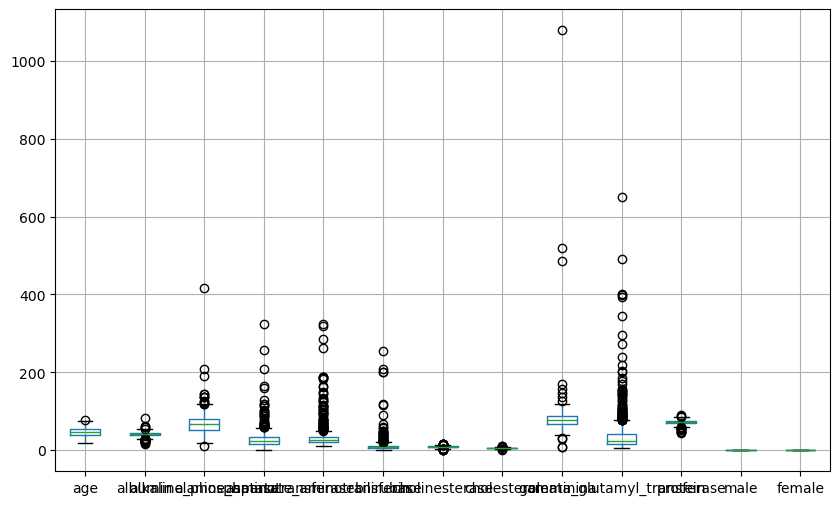

In [21]:
# outlier checking
plt.figure(figsize=(10,6))
features.boxplot()
plt.show()

In [22]:
# remove outliers(capping method)
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme=Q1-1.5*IQR
    Upper_Extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in features.select_dtypes(['int','float']).columns:
    outlier_capping(features,col)

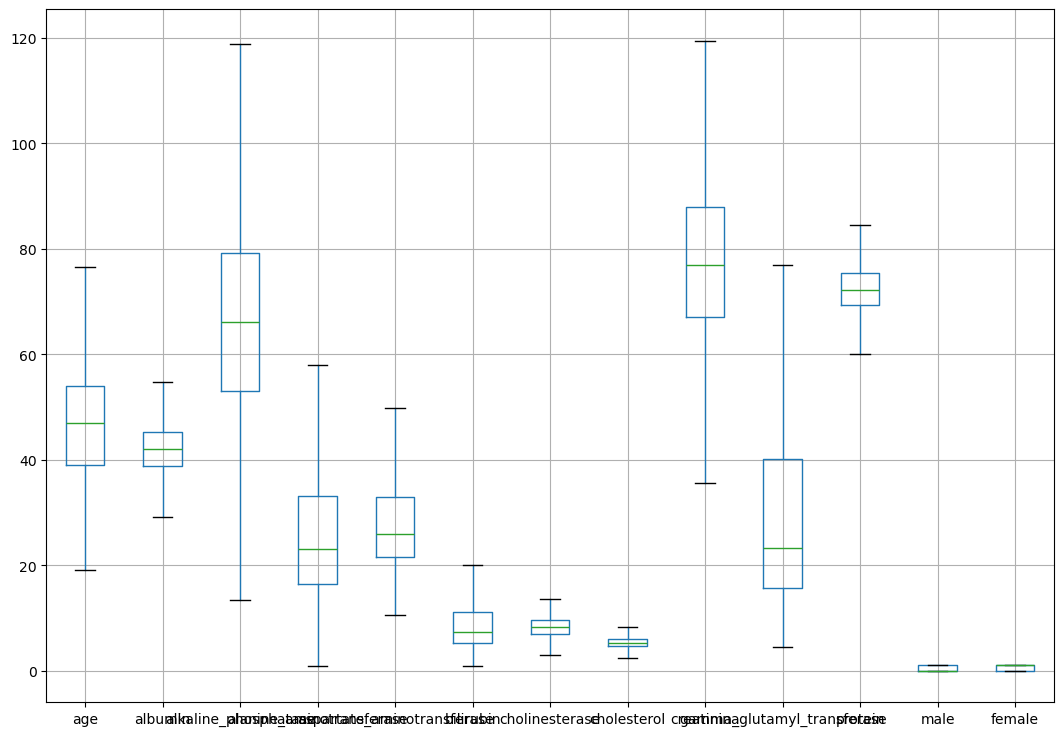

In [23]:
# after removing outliers
plt.figure(figsize=(13,9))
features.boxplot()
plt.show()

<Axes: >

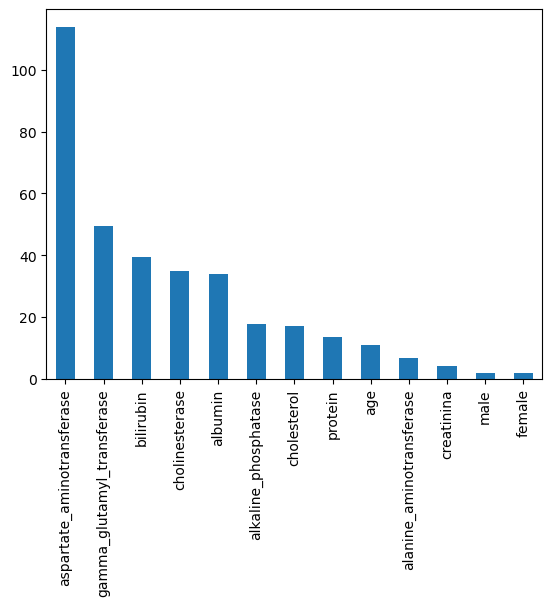

In [24]:
# feature selection
# f_classif helps to find how strongly each feature is related to the target variable
from sklearn.feature_selection import f_classif
f_class=f_classif(features,target)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")

# High F-score: the feature has a stronger relationship with the target variable.
# Low F-score:the feature is less significant in predicting the target.

In [25]:
# features with low 
features.drop(columns=['age','alanine_aminotransferase','creatinina','male','female'],inplace=True)
features

,albumin,alkaline_phosphatase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,gamma_glutamyl_transferase,protein
0,38.5,52.500,22.10,7.50,6.9300,3.23,12.10,69.0
1,38.5,70.300,24.70,3.90,11.1700,4.80,15.60,76.5
2,46.9,74.700,49.85,6.10,8.8400,5.20,33.20,79.3
3,43.2,52.000,22.60,18.90,7.3300,4.74,33.80,75.7
4,39.2,74.100,24.80,9.60,9.1500,4.32,29.90,68.7
...,...,...,...,...,...,...,...,...
610,32.0,118.825,49.85,20.05,5.5700,6.30,76.95,68.5
611,29.2,102.800,44.40,20.00,2.9525,3.02,35.90,71.3
612,29.2,87.300,49.85,20.05,2.9525,3.63,64.20,82.0
613,33.0,66.200,49.85,20.00,3.5600,4.20,50.00,71.0


In [26]:
# LabelEncode:to convert target into numbers
lab_enc=LabelEncoder()
target=lab_enc.fit_transform(target)
target=pd.DataFrame(target,columns=['category'])
target.head()

,category
0,3
1,3
2,3
3,3
4,3


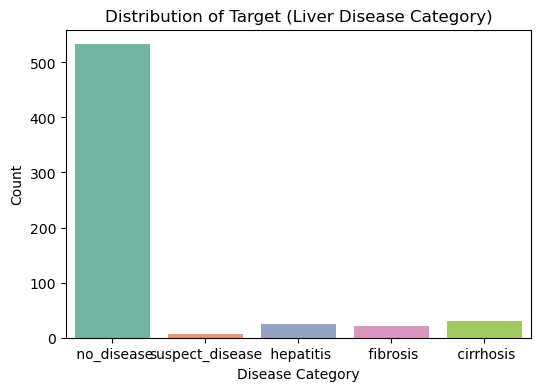

In [27]:
# Visualization
# count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category', palette="Set2")
plt.title("Distribution of Target (Liver Disease Category)")
plt.xlabel("Disease Category")
plt.ylabel("Count")
plt.show()

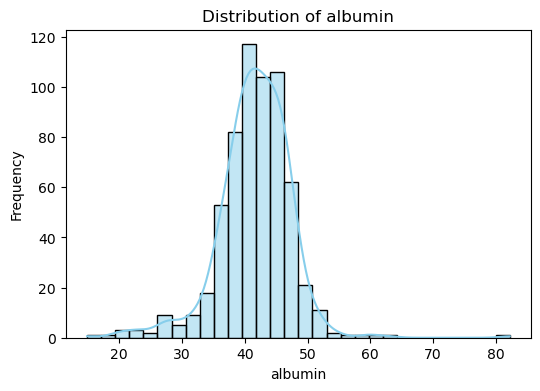

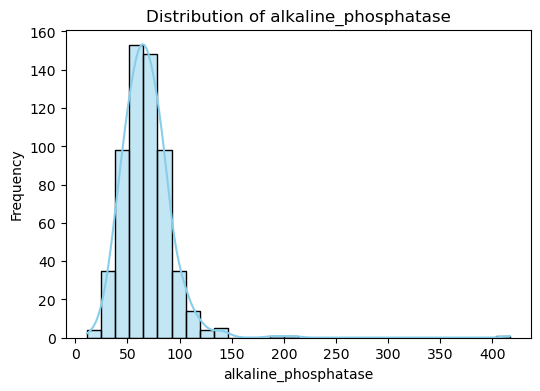

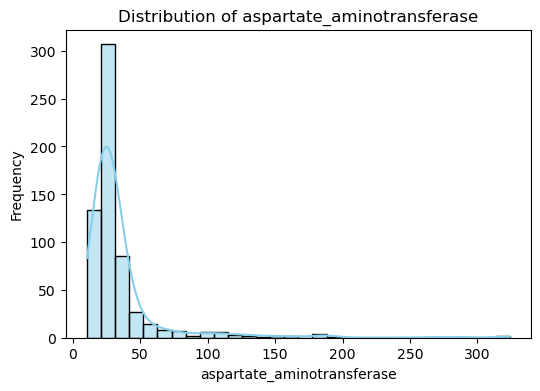

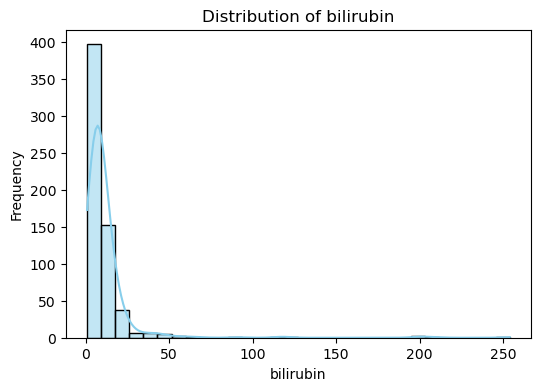

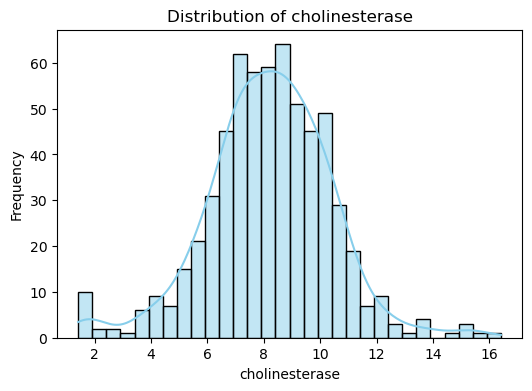

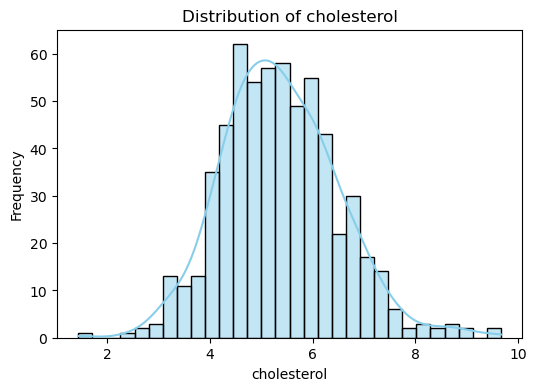

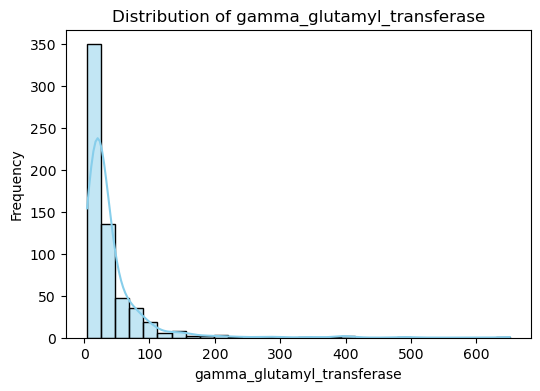

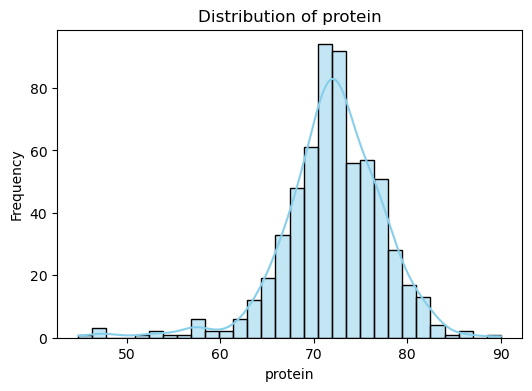

In [28]:
# Histogram for all numeric features
# The histogram shows the spread of data for column 
# The curve shows the shape of the distribution
# If it is bell-shaped: normally distributed.
# If it is skewed (long tail): not normally distributed, may need scaling
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True,bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

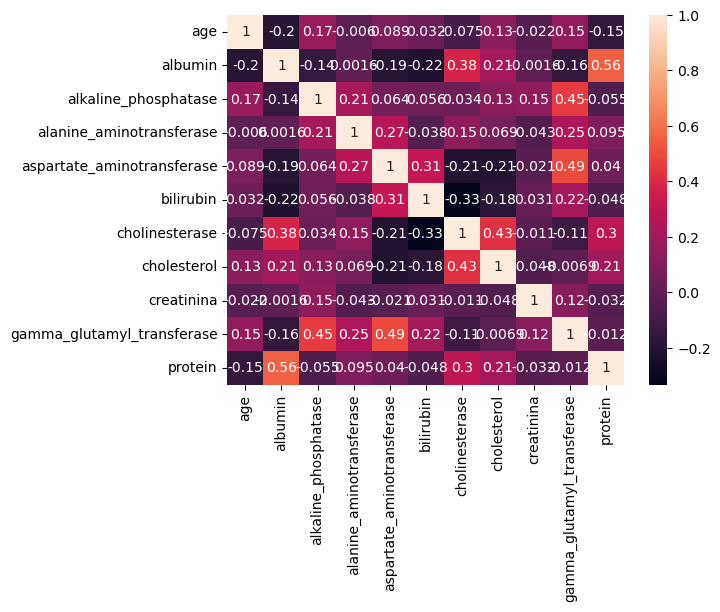

In [29]:
# correlation
# Select only numeric columns for correlation
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [30]:
# Train_Test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(461, 8)
(154, 8)
(461, 1)
(154, 1)


In [31]:
# Scaling
std_sca=StandardScaler()
features=pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
features.head()

,albumin,alkaline_phosphatase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,gamma_glutamyl_transferase,protein
0,-0.642747,-0.748053,-0.661420,-0.274541,-0.612353,-1.958618,-0.903424,-0.669572
1,-0.642747,0.152607,-0.399597,-0.991030,1.428327,-0.514037,-0.741189,0.897985
2,1.042880,0.375242,2.133046,-0.553176,0.306916,-0.145992,0.074621,1.483206
3,0.300401,-0.773352,-0.611070,1.994341,-0.419836,-0.569244,0.102432,0.730779
4,-0.502278,0.344883,-0.389526,0.143411,0.456117,-0.955693,-0.078344,-0.732274


In [32]:
# Model building
# Scale features for models like SVM, KNN, LR, RF, DT
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ Best Parameters: {'C': 1, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Logistic Regression Results (After GridSearchCV)
Accuracy: 0.8766233766233766
Precision: 0.4341730279898218
Recall: 0.43968253968253973
F1 Score: 0.4292433285795611

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.25      0.11      0.15         9
           2       0.30      0.43      0.35         7
           3       0.95      0.99      0.97       126
           4       0.00      0.00      0.00         3

    accuracy                           0.88       154
   macro avg       0.43      0.44      0.43       154
weighted avg       0.85      0.88      0.86       154



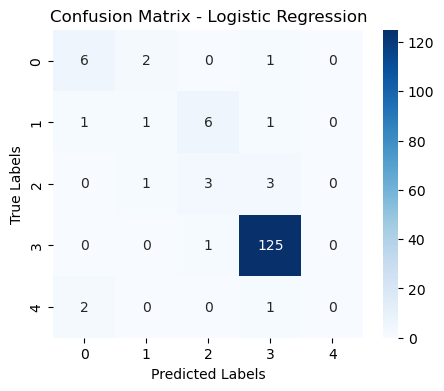

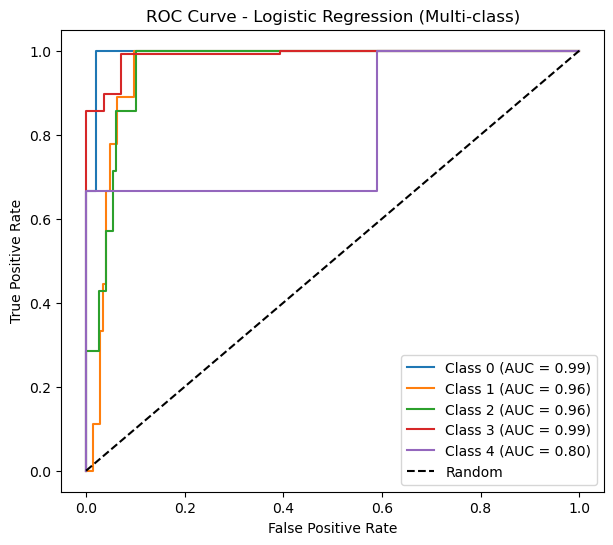

In [33]:
# Logistic Regression

# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1. Define Base Model
log_reg = LogisticRegression(max_iter=2000)

# -----------------------------------------------------
# 2. Define Hyperparameter Grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # solvers that support l1/l2/elasticnet
    'l1_ratio': [0, 0.5, 1]           # used only if elasticnet
}

# -----------------------------------------------------
# 3. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# -----------------------------------------------------
#  4. Best Model
best_log_reg = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# -----------------------------------------------------
# 5. Predictions
y_pred_lr = best_log_reg.predict(X_test_scaled)
y_prob_lr = best_log_reg.predict_proba(X_test_scaled)[:, 1]  # for ROC curve

# -----------------------------------------------------
# 6. Model Evaluation
print("\n📊 Logistic Regression Results (After GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='macro'))
print("Recall:", recall_score(y_test, y_pred_lr, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# -----------------------------------------------------
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# -----------------------------------------------------
# Convert y_test to binary format for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_prob_lr = best_log_reg.predict_proba(X_test_scaled)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Multi-class)')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

📊 KNN Results (After GridSearchCV)
Accuracy: 0.8896103896103896
Precision: 0.614954051796157
Recall: 0.5158730158730159
F1 Score: 0.5519390819390819

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.44      0.44      0.44         9
           2       0.33      0.14      0.20         7
           3       0.94      0.99      0.97       126
           4       0.50      0.33      0.40         3

    accuracy                           0.89       154
   macro avg       0.61      0.52      0.55       154
weighted avg       0.87      0.89      0.88       154



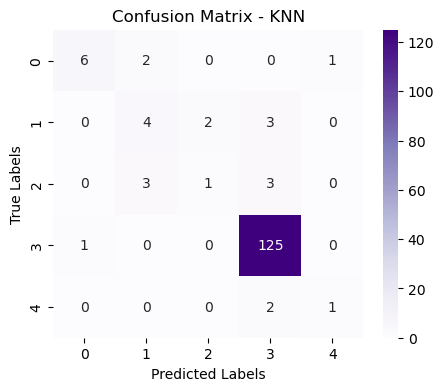

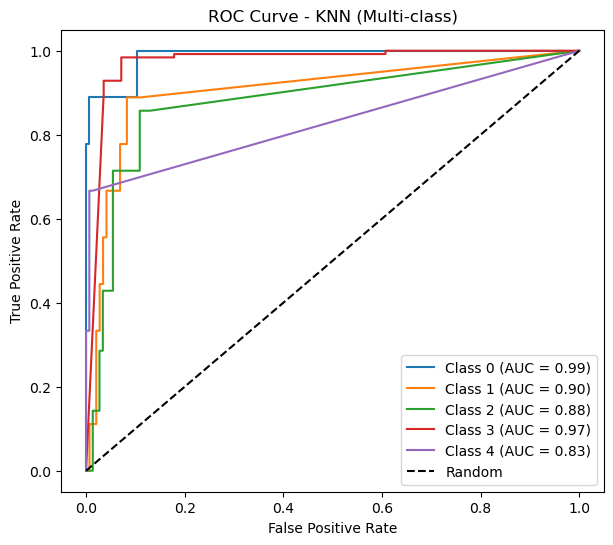

In [34]:
# K-Nearest Neighbors (KNN)

# Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------
# 1. Define Base Model
knn = KNeighborsClassifier()

# -----------------------------------------------------
# 2. Define Hyperparameter Grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# -----------------------------------------------------
# 3. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# -----------------------------------------------------
# 4. Best Model
best_knn = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# -----------------------------------------------------
# 5. Predictions
y_pred_knn = best_knn.predict(X_test_scaled)
y_prob_knn = best_knn.predict_proba(X_test_scaled)

# -----------------------------------------------------
# 6. Model Evaluation
print("\n📊 KNN Results (After GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# -----------------------------------------------------
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# -----------------------------------------------------
# 8. ROC Curve (Handles Multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_knn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Multi-class)')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
✅ Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

📊 SVM Results (After GridSearchCV)
Accuracy: 0.8831168831168831
Precision: 0.47833333333333333
Recall: 0.42857142857142855
F1 Score: 0.444868154158215

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.38      0.33      0.35         9
           2       0.33      0.14      0.20         7
           3       0.93      1.00      0.97       126
           4       0.00      0.00      0.00         3

    accuracy                           0.88       154
   macro avg       0.48      0.43      0.44       154
weighted avg       0.84      0.88      0.86       154



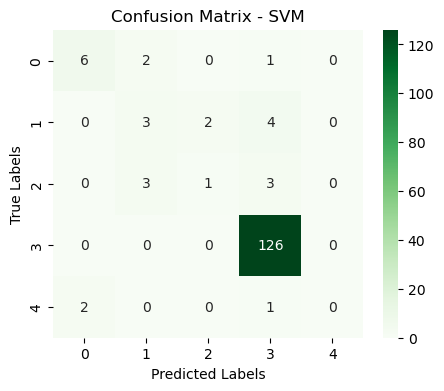

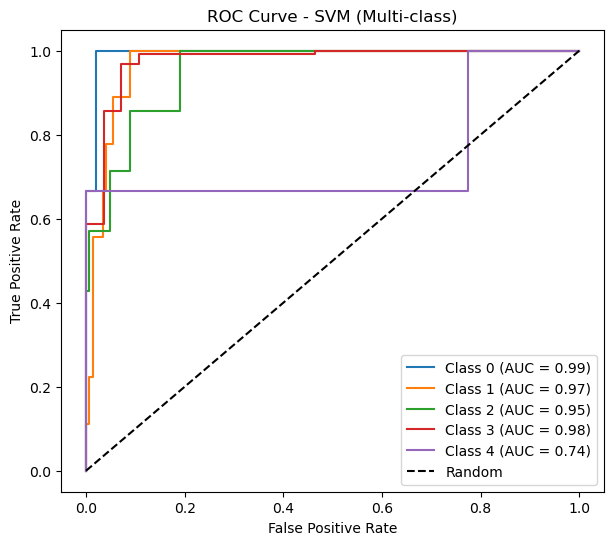

In [35]:
# Support Vector Machine(SVM)
# Import Libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------
# 1. Define Base Model
svm = SVC(probability=True)  # Enable probability estimates for ROC

# -----------------------------------------------------
# 2. Define Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# -----------------------------------------------------
# 3. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# -----------------------------------------------------
# 4. Best Model
best_svm = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# -----------------------------------------------------
# 5. Predictions
y_pred_svm = best_svm.predict(X_test_scaled)
y_prob_svm = best_svm.predict_proba(X_test_scaled)

# -----------------------------------------------------
# 6. Model Evaluation
print("\n📊 SVM Results (After GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# -----------------------------------------------------
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# -----------------------------------------------------
# 8. ROC Curve (Handles Multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Multi-class)')
plt.legend(loc='lower right')
plt.show()



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}

📊 Decision Tree Results (After GridSearchCV)
Accuracy: 0.8246753246753247
Precision: 0.4364835164835165
Recall: 0.42698412698412697
F1 Score: 0.4273410799726589

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.15      0.22      0.18         9
           2       0.60      0.43      0.50         7
           3       0.93      0.93      0.93       126
           4       0.00      0.00      0.00         3

    accuracy                           0.82       154
   macro avg       0.44      0.43      0.43       154
weighted avg       0.83      0.82      0.82       154



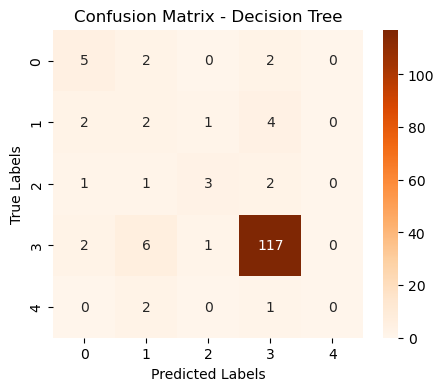

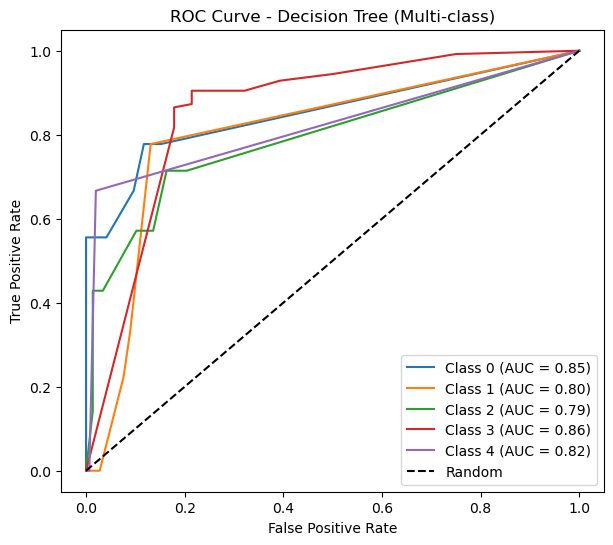

In [36]:
# Decision Tree Classifier

# Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------
# 1. Define Base Model
dt = DecisionTreeClassifier(random_state=42)

# -----------------------------------------------------
# 2. Define Hyperparameter Grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

# -----------------------------------------------------
# 3. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# -----------------------------------------------------
# 4. Best Model
best_dt = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# -----------------------------------------------------
# 5. Predictions
y_pred_dt = best_dt.predict(X_test_scaled)
y_prob_dt = best_dt.predict_proba(X_test_scaled)

# -----------------------------------------------------
# 6. Model Evaluation
print("\n📊 Decision Tree Results (After GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# -----------------------------------------------------
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# -----------------------------------------------------
# 8. ROC Curve (Handles Multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_dt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Multi-class)')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
✅ Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

📊 Random Forest Results (After GridSearchCV)
Accuracy: 0.8766233766233766
Precision: 0.5561594202898551
Recall: 0.4841269841269841
F1 Score: 0.5093939393939395

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.00      0.00      0.00         9
           2       0.38      0.43      0.40         7
           3       0.91      0.99      0.95       126
           4       0.50      0.33      0.40         3

    accuracy                           0.88       154
   macro avg       0.56      0.48      0.51       154
weighted avg       0.83      0.88      0.85       154



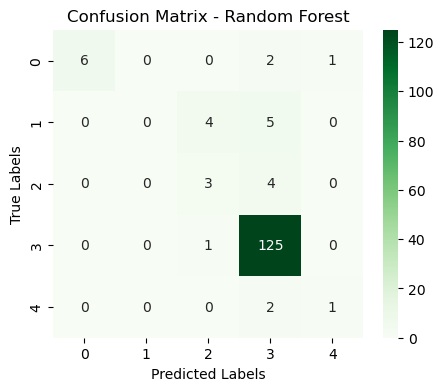

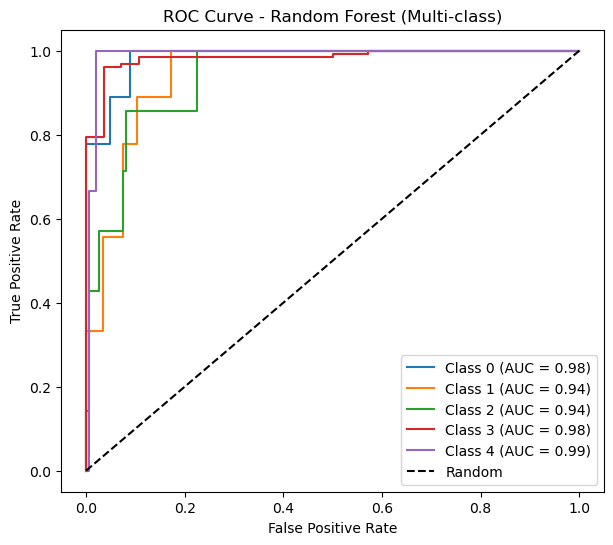

In [37]:
# Random Forest Classifier

# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------
# 1. Define Base Model
rf = RandomForestClassifier(random_state=42)

# -----------------------------------------------------
# 2. Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# -----------------------------------------------------
# 3. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# -----------------------------------------------------
# 4. Best Model
best_rf = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# -----------------------------------------------------
# 5. Predictions
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)

# -----------------------------------------------------
#  6. Model Evaluation
print("\n📊 Random Forest Results (After GridSearchCV)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# -----------------------------------------------------
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# -----------------------------------------------------
# 8. ROC Curve (Handles Multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(7,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-class)')
plt.legend(loc='lower right')
plt.show()



In [49]:
# Overall Model Performance Comparison
# --- Model performance data ---
data = {
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression',
              'Random Forest', 'Decision Tree'],
    'Accuracy': [0.8896, 0.8831, 0.8766, 0.8766, 0.8247],
    'Precision': [0.6150, 0.4783, 0.4342, 0.5562, 0.4365],
    'Recall': [0.5159, 0.4286, 0.4397, 0.4841, 0.4270],
    'F1 Score': [0.5519, 0.4449, 0.4292, 0.5094, 0.4273],
    'ROC-AUC': [0.9143, 0.9267, 0.9402, 0.9683, 0.8256],
    'CV Mean Accuracy': [0.9284, 0.9284, 0.9306, 0.9328, 0.9133]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Display table
print("📘 Final Model Performance Comparison\n")
print(results_df.to_string(index=False))


📘 Final Model Performance Comparison

                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC  CV Mean Accuracy
   K-Nearest Neighbors    0.8896     0.6150  0.5159    0.5519   0.9143            0.9284
Support Vector Machine    0.8831     0.4783  0.4286    0.4449   0.9267            0.9284
   Logistic Regression    0.8766     0.4342  0.4397    0.4292   0.9402            0.9306
         Random Forest    0.8766     0.5562  0.4841    0.5094   0.9683            0.9328
         Decision Tree    0.8247     0.4365  0.4270    0.4273   0.8256            0.9133


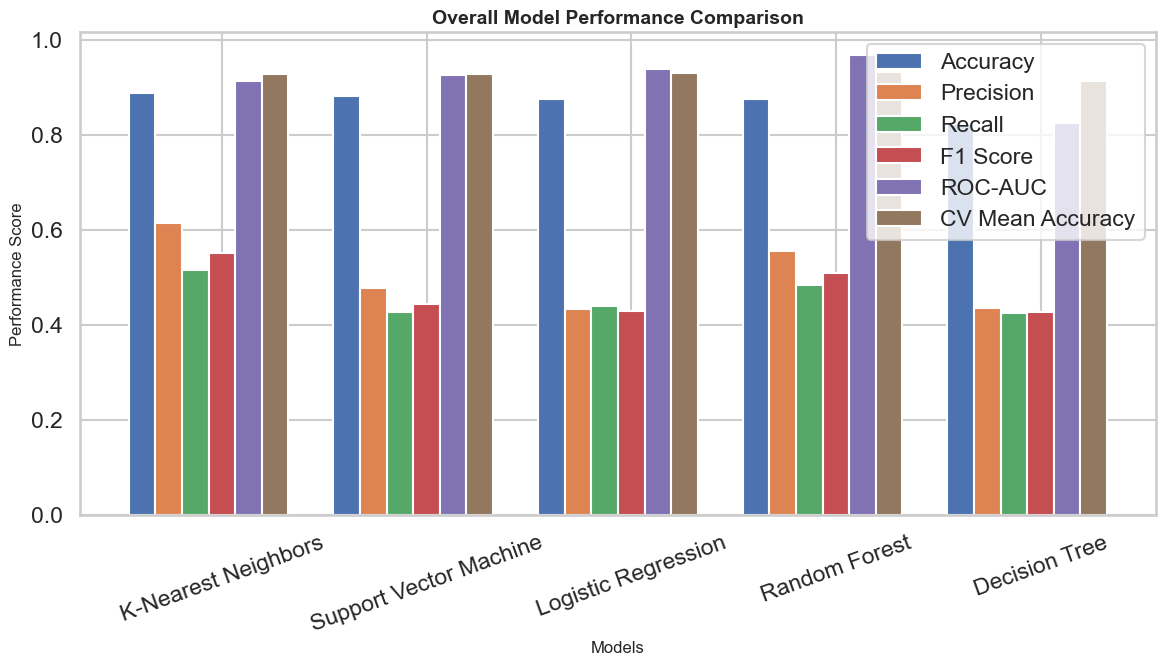

In [48]:
# Model Visualization
# --- Model performance data ---
data = {
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression',
              'Random Forest', 'Decision Tree'],
    'Accuracy': [0.8896, 0.8831, 0.8766, 0.8766, 0.8247],
    'Precision': [0.6150, 0.4783, 0.4342, 0.5562, 0.4365],
    'Recall': [0.5159, 0.4286, 0.4397, 0.4841, 0.4270],
    'F1 Score': [0.5519, 0.4449, 0.4292, 0.5094, 0.4273],
    'ROC-AUC': [0.9143, 0.9267, 0.9402, 0.9683, 0.8256],
    'CV Mean Accuracy': [0.9284, 0.9284, 0.9306, 0.9328, 0.9133]
}

# Convert to DataFrame
results_df = pd.DataFrame(data)

# Melt the dataframe for grouped plotting
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# --- Plot grouped bar chart ---
plt.figure(figsize=(12, 7))
bar_width = 0.13

# Unique models and metrics
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'CV Mean Accuracy']
x = np.arange(len(models))

# Plot each metric with an offset
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric)

# Labels and layout
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.title('Overall Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x + bar_width * (len(metrics) / 2), models, rotation=20)
plt.legend()
plt.tight_layout()
plt.show()
